This note includes

- position offset scatter

- radio-to-optical distance $\rho$ (angular separation)

- radio-to-optical distance $X$ (normalized separation)

- scatter of $\rho$ and $X$

In [1]:
from astropy.table import Table, join, Column
from astropy import units as u
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, NullFormatter
import numpy as np
from scipy import stats
rayleigh = stats.rayleigh

%matplotlib inline

In [2]:
comsou = Table.read("../data/multiwav-offset-in-Gaia-frame.fits")

In [3]:
# Median value
perX1 = np.quantile(comsou["nor_sep_sx_cor"], [0.25, 0.5, 0.75])
perX2 = np.quantile(comsou["nor_sep_k_cor"], [0.25, 0.5, 0.75])
perX3 = np.quantile(comsou["nor_sep_ka_cor"], [0.25, 0.5, 0.75])

print("Normalized separation X")
print("              25th  50th  75th")
print("S/X  - Gaia   {:.2f}  {:.2f}  {:.2f}".format(*perX1))
print("K    - Gaia   {:.2f}  {:.2f}  {:.2f}".format(*perX2))
print("X/Ka - Gaia   {:.2f}  {:.2f}  {:.2f}".format(*perX3))

Normalized separation X
              25th  50th  75th
S/X  - Gaia   1.20  1.89  3.17
K    - Gaia   0.97  1.61  2.50
X/Ka - Gaia   1.16  1.87  2.96


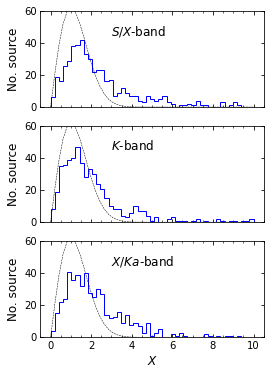

In [4]:
# Histogram of normalized separation
fig, (ax0, ax1, ax2) = plt.subplots(figsize=(4, 6), nrows=3, sharex=True, sharey=True)

bins_set = np.linspace(0, 10, 50)

# A standard Rayleigh distribution of unit standard deviation
fac = 10. / 50 * len(comsou)
rayleigh_dist = rayleigh.pdf(bins_set) * fac

ax0.plot(bins_set, rayleigh_dist, "k--", linewidth=0.5)
ax1.plot(bins_set, rayleigh_dist, "k--", linewidth=0.5)
ax2.plot(bins_set, rayleigh_dist, "k--", linewidth=0.5)

# Plot
# X - Gaia
ax0.hist(comsou["nor_sep_sx_cor"], bins_set, histtype="step", fill=False, color="b")

# K - Gaia
ax1.hist(comsou["nor_sep_k_cor"], bins_set, histtype="step", fill=False, color="b")

# Ka - Gaia
ax2.hist(comsou["nor_sep_ka_cor"], bins_set, histtype="step", fill=False, color="b")

ylim = 60
ax0.set_ylim([0, ylim])

posx, posy = 3, 45
ax0.text(posx, posy, "$S/X$-band", fontsize=12)
ax1.text(posx, posy, "$K$-band", fontsize=12)
ax2.text(posx, posy, "$X/Ka$-band", fontsize=12)

ax0.set_ylabel("No. source", fontsize=12)
ax1.set_ylabel("No. source", fontsize=12)
ax2.set_ylabel("No. source", fontsize=12)

ax2.set_xlabel("$X$ ", fontsize=12)
ax2.xaxis.set_minor_locator(MultipleLocator(0.5))

In [5]:
lim = 1000

mask0 = comsou["nor_sep_sx_cor"] < lim
comsou0 = comsou[mask0]
loc0, scale0 = rayleigh.fit(comsou0["nor_sep_sx_cor"], floc=0)

mask1 = comsou["nor_sep_k_cor"] < lim
comsou1 = comsou[mask1]
loc1, scale1 = rayleigh.fit(comsou0["nor_sep_k_cor"], floc=0)

mask2 = comsou["nor_sep_ka_cor"] < lim
comsou2 = comsou[mask2]
loc2, scale2 = rayleigh.fit(comsou0["nor_sep_ka_cor"], floc=0)

print("X_lim={:d} \n"
      "Bands    No.Sou   No.Outlier  Std".format(lim))
line_fmt = "{:3d}      {:3d}         {:.2f}"
print("S/X     ", line_fmt.format(len(comsou0), len(comsou)-len(comsou0), scale0))
print("K       ", line_fmt.format(len(comsou1), len(comsou)-len(comsou1), scale1))
print("X/Ka    ", line_fmt.format(len(comsou2), len(comsou)-len(comsou2), scale2))

lim = 10

mask0 = comsou["nor_sep_sx_cor"] < lim
comsou0 = comsou[mask0]
loc0, scale0 = rayleigh.fit(comsou0["nor_sep_sx_cor"], floc=0)

mask1 = comsou["nor_sep_k_cor"] < lim
comsou1 = comsou[mask1]
loc1, scale1 = rayleigh.fit(comsou0["nor_sep_k_cor"], floc=0)

mask2 = comsou["nor_sep_ka_cor"] < lim
comsou2 = comsou[mask2]
loc2, scale2 = rayleigh.fit(comsou0["nor_sep_ka_cor"], floc=0)

print("\nX_lim={:d} \n"
      "Bands    No.Sou   No.Outlier  Std".format(lim))
line_fmt = "{:3d}      {:3d}         {:.2f}"
print("S/X     ", line_fmt.format(len(comsou0), len(comsou)-len(comsou0), scale0))
print("K       ", line_fmt.format(len(comsou1), len(comsou)-len(comsou1), scale1))
print("X/Ka    ", line_fmt.format(len(comsou2), len(comsou)-len(comsou2), scale2))

lim = 3

mask0 = comsou["nor_sep_sx_cor"] < lim
comsou0 = comsou[mask0]
loc0, scale0 = rayleigh.fit(comsou0["nor_sep_sx_cor"], floc=0)

mask1 = comsou["nor_sep_k_cor"] < lim
comsou1 = comsou[mask1]
loc1, scale1 = rayleigh.fit(comsou0["nor_sep_k_cor"], floc=0)

mask2 = comsou["nor_sep_ka_cor"] < lim
comsou2 = comsou[mask2]
loc2, scale2 = rayleigh.fit(comsou0["nor_sep_ka_cor"], floc=0)

print("\nX_lim={:d} \n"
      "Bands    No.Sou   No.Outlier  Std".format(lim))
line_fmt = "{:3d}      {:3d}         {:.2f}"
print("S/X     ", line_fmt.format(len(comsou0), len(comsou)-len(comsou0), scale0))
print("K       ", line_fmt.format(len(comsou1), len(comsou)-len(comsou1), scale1))
print("X/Ka    ", line_fmt.format(len(comsou2), len(comsou)-len(comsou2), scale2))

lim = 3.52

mask0 = comsou["nor_sep_sx_cor"] < lim
comsou0 = comsou[mask0]
loc0, scale0 = rayleigh.fit(comsou0["nor_sep_sx_cor"], floc=0)

mask1 = comsou["nor_sep_k_cor"] < lim
comsou1 = comsou[mask1]
loc1, scale1 = rayleigh.fit(comsou0["nor_sep_k_cor"], floc=0)

mask2 = comsou["nor_sep_ka_cor"] < lim
comsou2 = comsou[mask2]
loc2, scale2 = rayleigh.fit(comsou0["nor_sep_ka_cor"], floc=0)

print("\nX_lim={:.2f} \n"
      "Bands    No.Sou   No.Outlier  Std".format(lim))
line_fmt = "{:3d}      {:3d}         {:.2f}"
print("S/X     ", line_fmt.format(len(comsou0), len(comsou)-len(comsou0), scale0))
print("K       ", line_fmt.format(len(comsou1), len(comsou)-len(comsou1), scale1))
print("X/Ka    ", line_fmt.format(len(comsou2), len(comsou)-len(comsou2), scale2))


X_lim=1000 
Bands    No.Sou   No.Outlier  Std
S/X      512        0         3.29
K        512        0         2.42
X/Ka     512        0         2.62

X_lim=10 
Bands    No.Sou   No.Outlier  Std
S/X      489       23         2.04
K        504        8         1.64
X/Ka     500       12         1.87

X_lim=3 
Bands    No.Sou   No.Outlier  Std
S/X      374      138         1.20
K        420       92         1.17
X/Ka     387      125         1.46

X_lim=3.52 
Bands    No.Sou   No.Outlier  Std
S/X      397      115         1.29
K        439       73         1.21
X/Ka     418       94         1.49


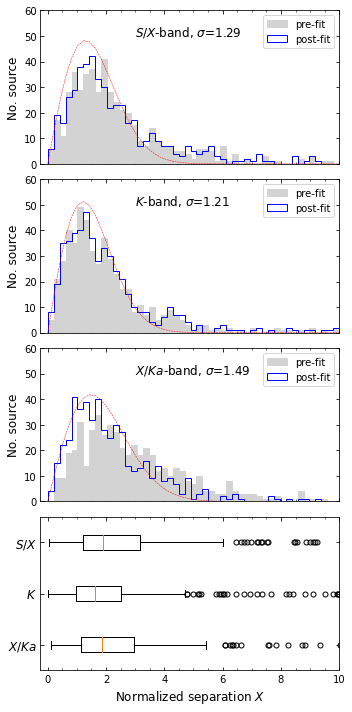

In [6]:
# Histogram of normalized separation
fig, (ax0, ax1, ax2, ax3) = plt.subplots(figsize=(5, 10), nrows=4, sharex=True)

# Fitted Rayleigh shape
xlim = 10
bins_set = np.linspace(0, xlim, 50)
rayleigh_dist0 = stats.rayleigh.pdf(bins_set, loc0, scale0) * fac
rayleigh_dist1 = stats.rayleigh.pdf(bins_set, loc1, scale1) * fac
rayleigh_dist2 = stats.rayleigh.pdf(bins_set, loc2, scale2) * fac

ax0.plot(bins_set, rayleigh_dist0, "r--", linewidth=0.5)
ax1.plot(bins_set, rayleigh_dist1, "r--", linewidth=0.5)
ax2.plot(bins_set, rayleigh_dist2, "r--", linewidth=0.5)

# Plot
# SX - Gaia
n0, bin0, pat = ax0.hist(comsou["nor_sep_sx"], bins_set, histtype="step",
                         color="lightgrey", fill=True, label="pre-fit")
n0, bin0, pat = ax0.hist(comsou["nor_sep_sx_cor"], bins_set, histtype="step",
                         fill=False, color="b", label="post-fit")

# K - Gaia
n1, bin1, pat = ax1.hist(comsou["nor_sep_k"], bins_set, histtype="step",
                         color="lightgrey", fill=True, label="pre-fit")
n1, bin1, pat = ax1.hist(comsou["nor_sep_k_cor"], bins_set, histtype="step",
                         fill=False, color="b", label="post-fit")

# XKa - Gaia
n2, bin2, pat = ax2.hist(comsou["nor_sep_ka"], bins_set, histtype="step",
                         color="lightgrey", fill=True, label="pre-fit")
n2, bin2, pat = ax2.hist(comsou["nor_sep_ka_cor"], bins_set, histtype="step",
                         fill=False, color="b", label="post-fit")

posx, posy = 3, 50
ax0.text(posx, posy, "$S/X$-band, $\sigma$={:.2f}".format(scale0), fontsize=12)
ax1.text(posx, posy, "$K$-band, $\sigma$={:.2f}".format(scale1), fontsize=12)
ax2.text(posx, posy, "$X/Ka$-band, $\sigma$={:.2f}".format(scale2), fontsize=12)

ylim = 60
ax0.set_ylim([0, ylim])
ax1.set_ylim([0, ylim])
ax2.set_ylim([0, ylim])
ax0.set_xlim([-0.25, xlim])

ax0.xaxis.set_minor_locator(MultipleLocator(0.5))
ax0.set_ylabel("No. source", fontsize=12)
ax1.set_ylabel("No. source", fontsize=12)
ax2.set_ylabel("No. source", fontsize=12)

flierprops = dict(marker="o", markerfacecolor="none", markersize=5,
                  lw=0.5, linestyle="none")
boxdata = ax3.boxplot([comsou["nor_sep_ka_cor"],
                       comsou["nor_sep_k_cor"],
                       comsou["nor_sep_sx_cor"]],
                      vert=False, flierprops=flierprops)
ax3.set_yticks(np.arange(1, 4))
ax3.set_yticklabels(["$X/Ka$", "$K$", "$S/X$"], fontsize=12)
ax3.set_xlabel("Normalized separation $X$", fontsize=12)

ax0.legend()
ax1.legend()
ax2.legend()

plt.tight_layout()
plt.subplots_adjust(hspace=0.1)

In [7]:
bands = ["X/Ka", "K", "S/X"]

print("Statistical information extracted from the boxplot")
print("Band  Min    Q1     Q2     Q3     Max    No.outlier")

lw = "{:4s} " + " {:.2f}  " * 5 + "{:3d}"

for i in range(len(bands)):
    print(lw.format(bands[i],
                    boxdata["whiskers"][2*i].get_xdata()[1],
                    boxdata["whiskers"][2*i].get_xdata()[0],
                    boxdata["medians"][i].get_xdata()[0],
                    boxdata["whiskers"][2*i+1].get_xdata()[0],
                    boxdata["whiskers"][2*i+1].get_xdata()[1],
                    len(boxdata["fliers"][i].get_xdata())))

Statistical information extracted from the boxplot
Band  Min    Q1     Q2     Q3     Max    No.outlier
X/Ka  0.10   1.16   1.87   2.96   5.42   26
K     0.02   0.97   1.61   2.50   4.71   35
S/X   0.06   1.20   1.89   3.17   6.01   42
